In [3]:
%load_ext autoreload
%autoreload 2

from lamp import ILAMP
from lamp import RBFInv
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
import time
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/fcmr/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


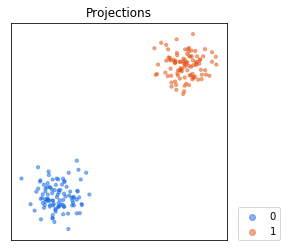

In [7]:
X, y = datasets.make_blobs(200, centers=[(-5.0, -5.0), (5.0, 5.0)])

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

COLORS = np.array([[0.09, 0.414, 0.9, 0.5],
                   [0.9, 0.333, 0.09, 0.5],
                   [0.09, 0.9, 0.171, 0.5],
                   [0.9, 0.09, 0.819, 0.5],
                   [0.495, 0.09, 0.9, 0.5],
                   [0.495, 0.9, 0.09, 0.5],
                   [0.09, 0.657, 0.9, 0.5],
                   [0.9, 0.09, 0.333, 0.5],
                   [0.9, 0.819, 0.09, 0.5],
                   [0.09, 0.9, 0.657, 0.5]])

colors = [COLORS[i] for i in y]
labels = ["0", "1"]
leg_colors = COLORS[:len(labels)]
plt.title("Projections")

ax = plt.subplot(111)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.scatter(X[:, 0], X[:, 1], color=colors, s=10.0)

handles = []
for c in leg_colors:
    handles.append(plt.scatter([], [], color=c))
ax.legend(handles, labels, loc="lower left", borderaxespad=0.0, bbox_to_anchor=(1.05, 0))

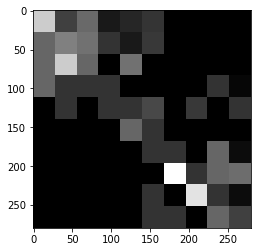

In [30]:
def make_img_grid(values, N):
    img_grid = np.zeros((N*28, N*28))
    for row in range(N):
        for col in range(N):
            img_grid[row*28:row*28 + 28, (9 - col)*28:(9 - col)*28 + 28] = values[row, col]
    return img_grid

divs = np.linspace(0.0, 1.0, 11)
coords = (divs[:-1] + divs[1:])*0.5
xx, yy = np.meshgrid(coords, coords)
p_coords = np.dstack((xx, yy))
p_coords = np.vstack(p_coords)

N = 10

ilamp = ILAMP()
ilamp.fit(X, X, n_neighbors=3)

samples_ilamp = ilamp.transform(p_coords)
diffs_ilamp = np.linalg.norm(samples_ilamp - p_coords, axis=1).reshape(N, N)
plt.imshow(make_img_grid(diffs_ilamp, N), cmap="gray")

In [26]:
diffs_ilamp.max()

3.510833468576701e-16

0.4722853990237663


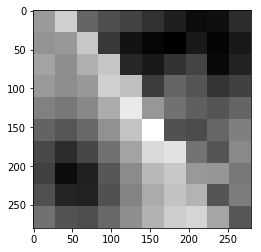

In [31]:
def multi_quadrics(r):
    return np.sqrt(c + eps*(r**2))

c = 0.0
eps = 10.0
irbf_mq0 = RBFInv()
irbf_mq0.fit(X, X, num_ctrl=10, mode='rols', kernel=multi_quadrics, normalize_c=True, normalize_d=True, 
         reg_coef=0.0)
invmq0 = irbf_mq0.transform(p_coords)

diffs_irbf = np.linalg.norm(invmq0 - p_coords, axis=1).reshape(N, N)
print(diffs_irbf.max())
plt.imshow(make_img_grid(diffs_irbf, N), cmap="gray")

4.146093572925544


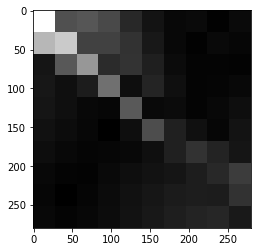

In [44]:
def gaussian(r):
    return np.exp(-(eps*(r**2.0)))

eps = 15.0

irbf_gk0 = RBFInv()
irbf_gk0.fit(X, X, num_ctrl=10, mode='rols', kernel=gaussian, normalize_c=True, normalize_d=True)
inv_gk0 = irbf_gk0.transform(p_coords)

diffs_irbf2 = np.linalg.norm(inv_gk0 - p_coords, axis=1).reshape(N, N)
print(diffs_irbf2.max())
plt.imshow(make_img_grid(diffs_irbf2, N), cmap="gray")

1.866448093307169


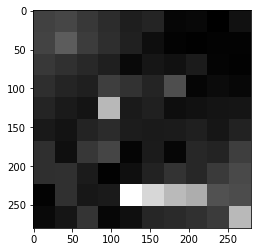

In [47]:
def gaussian(r):
    return np.exp(-(eps*(r**2.0)))

eps = 15.0

irbf_gk1 = RBFInv()
irbf_gk1.fit(X, X, num_ctrl=5, mode='neighbors', kernel=gaussian, normalize_c=True, normalize_d=True)
inv_gk1 = irbf_gk1.transform(p_coords)

diffs_irbf3 = np.linalg.norm(inv_gk1 - p_coords, axis=1).reshape(N, N)
print(diffs_irbf3.max())
plt.imshow(make_img_grid(diffs_irbf3, N), cmap="gray")

0.9563736754890043


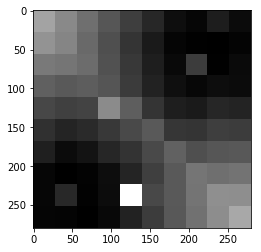

In [52]:
eps = 150000.0

irbf_gk2 = RBFInv()
irbf_gk2.fit(X, X, num_ctrl=4, mode='cluster', kernel=gaussian, normalize_c=True, normalize_d=True)
inv_gk2 = irbf_gk2.transform(p_coords)

diffs_irbf4 = np.linalg.norm(inv_gk2 - p_coords, axis=1).reshape(N, N)
print(diffs_irbf4.max())
plt.imshow(make_img_grid(diffs_irbf4, N), cmap="gray")